# Simulate synthetic bulk RNA-seq gene expression data

Nuha BinTayyash, 2020

This notebook shows how to Simulate synthetic bulk RNA-seq time series of $S =3$ samples, $D=  300$ genes at $T=6$ time points assuming three generative functions $f$: sine, cosine and cubic splines. The generated data from the three functions is exponentiated using exponential link function to set the mean of count data. Count data is sampled from negative binomial distribution parametrized by the probability of success $p=\frac{r}{\exp(f)+r}$ and number of failures $r =\frac{1}{dispersion} $.
 
Bulk_simulator.py used to simulated four datasets with two levels of the mean of count data (high count and low count datasets) and two levels of dispersion (high dispersion and low dispersion).


In [1]:
%run ./Bulk_simulator.py

100%|██████████| 2/2 [04:35<00:00, 137.54s/it]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Filter datasets to have mean counts higher than 1 and lower than 1000 for low counts dataset and lower than 100000 for high counts dataset 

In [3]:

def filter_counts(counts,max_value):
    counts = counts.T
    filtered_counts = counts.loc[:,(counts.mean(0) > 1.) & (counts.mean(0) <= max_value)]
    print((filtered_counts.values).shape[1])
    n, bins, patches = plt.hist(filtered_counts.mean(0), density=True, facecolor='g')
    plt.grid(True)
    plt.show()
    filtered_counts = filtered_counts.T
    return filtered_counts

def get_common_genes_between_two_ts(first_ts,second_ts):
    print('Before')
    print(first_ts.shape)
    print(second_ts.shape)
    shared_index = first_ts.index.intersection(second_ts.index)
    first_ts = first_ts.loc[shared_index]
    second_ts = second_ts.loc[shared_index]
    print('After')
    print(first_ts.shape)
    print(second_ts.shape)
    return first_ts,second_ts

(240, 18)
237


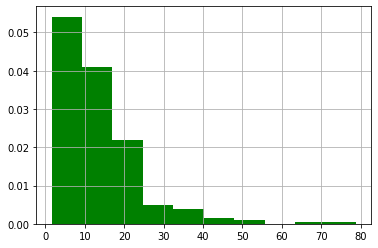

240


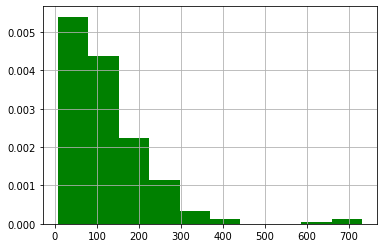

Before
(237, 18)
(240, 18)
After
(237, 18)
(237, 18)
shape (474, 18)
shape (400, 18)
(240, 18)
240


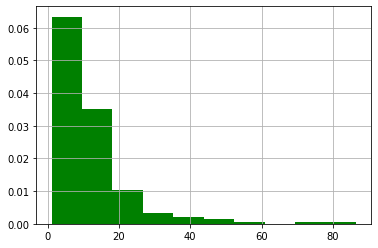

240


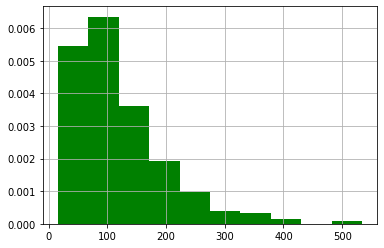

Before
(240, 18)
(240, 18)
After
(240, 18)
(240, 18)
shape (480, 18)
shape (400, 18)
(240, 18)
240


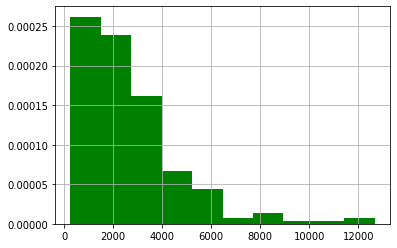

240


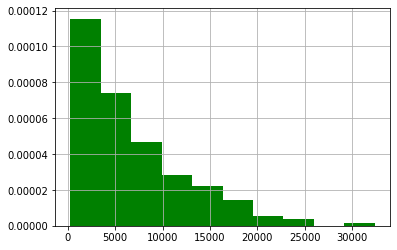

Before
(240, 18)
(240, 18)
After
(240, 18)
(240, 18)
shape (480, 18)
shape (400, 18)
(240, 18)
240


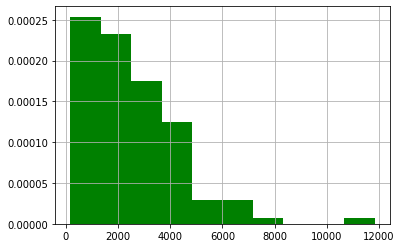

240


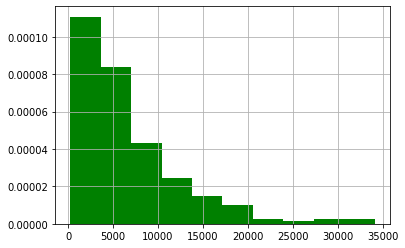

Before
(240, 18)
(240, 18)
After
(240, 18)
(240, 18)
shape (480, 18)
shape (400, 18)


In [7]:
filesname = ['low_counts_low_dispersion_differentially_expressed_genes'
             ,'low_counts_high_dispersion_differentially_expressed_genes'                                      
             ,'high_counts_low_dispersion_differentially_expressed_genes'
             ,'high_counts_high_dispersion_differentially_expressed_genes']
max_mean_count = [1000., 100000.] 

for filename in filesname:
    DE_samples = pd.read_csv(filename+'.csv',index_col=[0])
    print(DE_samples.shape)
    filename = filename.replace("differentially_expressed_genes", "non_differentially_expressed_genes")
    Non_DE_samples = pd.read_csv(filename+'.csv',index_col=[0])

    if filename.find('low_counts') != -1:
        max_num = max_mean_count[0]
    else:
        max_num = max_mean_count[1]
        
    DE_samples_filtered = filter_counts(DE_samples,max_num)
    Non_DE_samples_filtered = filter_counts(Non_DE_samples,max_num)
    
    DE_samples_filtered,Non_DE_samples_filtered = get_common_genes_between_two_ts(DE_samples_filtered,Non_DE_samples_filtered)
    
    DE_non_DE = DE_samples_filtered
    DE_non_DE = DE_non_DE.T
    # create a dataframe that have differentially expressed genes followed by non differentially expressed genes
    for i in range(Non_DE_samples_filtered.shape[0]):
        DE_non_DE.insert(i+i+1,Non_DE_samples_filtered.index.values[i] ,Non_DE_samples_filtered.iloc[[i]].values.T,True)
    DE_non_DE = DE_non_DE.T
    #print(DE_non_DE)
    genes = ['gene_%s' % (s+1) for s in range(DE_non_DE.shape[0])] 
    DE_non_DE.index = genes
    print('shape',DE_non_DE.shape)
    DE_non_DE.iloc[0:400,:].to_csv(filename+'_DE_non_DE_genes.csv')
    print('shape',DE_non_DE.iloc[0:400,:].shape)

In [5]:
DE_non_DE.iloc[0:400,:]

,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,3,3.1,3.2,4,4.1,4.2,5,5.1,5.2
gene_1,88.0,139.0,207.0,500.0,21.0,11.0,9.0,17.0,294.0,1187.0,1258.0,5076.0,610.0,260.0,123.0,3.0,1.0,4.0
gene_2,387.0,2728.0,406.0,302.0,567.0,941.0,1022.0,313.0,439.0,1348.0,814.0,296.0,1065.0,603.0,886.0,297.0,641.0,289.0
gene_3,120.0,229.0,250.0,265.0,46.0,210.0,157.0,1482.0,2277.0,1694.0,2029.0,3072.0,307.0,130.0,63.0,4.0,364.0,2358.0
gene_4,338.0,2683.0,869.0,528.0,2018.0,1014.0,1475.0,575.0,1467.0,1147.0,1219.0,506.0,1068.0,1204.0,899.0,318.0,2063.0,503.0
gene_5,6536.0,11512.0,7479.0,19883.0,9514.0,9499.0,12573.0,5396.0,5288.0,1685.0,1422.0,2073.0,235.0,97.0,45.0,10.0,258.0,1634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene_396,11024.0,16298.0,16293.0,8553.0,18635.0,13041.0,20480.0,9100.0,14562.0,5485.0,10225.0,21699.0,10666.0,17939.0,20043.0,12591.0,6236.0,9716.0
gene_397,90.0,31.0,67.0,77.0,240.0,1712.0,730.0,72.0,14.0,6.0,5.0,14.0,45.0,12118.0,3088.0,4582.0,34.0,2.0
gene_398,21239.0,3806.0,5460.0,3377.0,1885.0,10653.0,4854.0,1561.0,6629.0,5995.0,1987.0,3361.0,2488.0,3918.0,3663.0,1627.0,9294.0,7394.0
gene_399,105.0,109.0,536.0,327.0,1055.0,974.0,376.0,44.0,19.0,41.0,255.0,716.0,1241.0,6158.0,1549.0,2295.0,18.0,17.0
